In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
import seaborn as sns
from scipy.stats import linregress

In [2]:
filepath = "Resources/Cleaned.csv"
df = pd.read_csv(filepath)
df.price.unique()

array(['$$$$$', '$$$$', '$$$', '$$', '$', 'No Price'], dtype=object)

In [3]:
df.head()

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count
0,0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1
1,1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
2,2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
3,3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
4,4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1


In [4]:
mask = df.price != "No Price"
df_price = df.loc[mask]
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 0 to 689
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           519 non-null    int64  
 1   name                 519 non-null    object 
 2   year                 519 non-null    int64  
 3   latitude             519 non-null    float64
 4   longitude            519 non-null    float64
 5   city                 519 non-null    object 
 6   region               519 non-null    object 
 7   zipCode              519 non-null    object 
 8   cuisine              519 non-null    object 
 9   price                519 non-null    object 
 10  url                  519 non-null    object 
 11  Michelin Star Count  519 non-null    int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 52.7+ KB


In [5]:
df_price['Price Point'] = df_price['price'].apply(lambda x: len(x))
df_price.head()

<ipython-input-5-c12ded5f275e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Price Point'] = df_price['price'].apply(lambda x: len(x))


,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count,Price Point
0,0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1,5
1,1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
2,2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
3,3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
4,4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1,4


In [10]:
df1 = df.groupby('region')['name'].count()
df11 = pd.concat([df1], axis=1).reset_index()
df11.columns = ["Region", "Restaurants"]
summ11 = df11.sort_values(by=["Restaurants"], ascending=False)
summ11.head()

,Region,Restaurants
22,United Kingdom,162
1,California,90
12,New York City,74
8,Hong Kong,63
17,Singapore,39


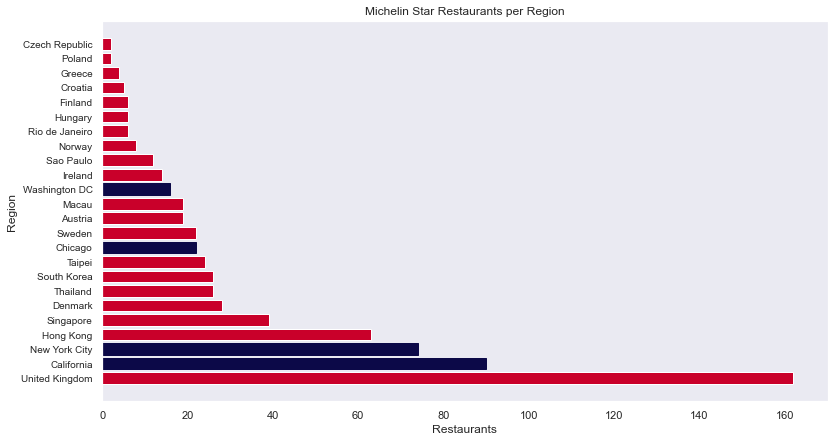

In [178]:
plt.figure(figsize=(13,7))
#0C0948
worldlist = plt.barh(summ11.Region, summ11.Restaurants, color="#C9002A")
worldlist[1].set_color("#0C0948")
worldlist[2].set_color("#0C0948")
worldlist[9].set_color("#0C0948")
worldlist[13].set_color("#0C0948")
plt.xlabel("Restaurants")
plt.ylabel("Region")
plt.title("Michelin Star Restaurants per Region")
plt.yticks(fontsize=10)
plt.grid()
plt.savefig("RegionCount.png", bbox_inches = 'tight')
plt.show()

In [149]:
mask_sing = df.region == "Singapore"
df_sing = df.loc[mask_sing].reset_index()
df_sing.cuisine.value_counts()

Cantonese                5
French contemporary      5
Innovative               5
Sushi                    5
Chinese                  3
European contemporary    2
Street Food              2
Australian               2
French                   2
Italian                  1
Indian                   1
Steakhouse               1
Peranakan                1
Japanese contemporary    1
Barbecue                 1
Fujian                   1
Italian contemporary     1
Name: cuisine, dtype: int64

In [150]:
mask_hk = df.region == "Hong Kong"
df_hk = df.loc[mask_hk].reset_index()
df_hk.cuisine.value_counts()

Cantonese                24
Innovative                6
French                    4
French contemporary       4
Sushi                     4
Italian                   3
Shanghainese              3
Japanese                  3
Cantonese Roast Meats     2
European contemporary     2
Noodles and congee        1
Teppanyaki                1
Indian                    1
Seafood                   1
Dim Sum                   1
Sichuan                   1
Steakhouse                1
Taizhou                   1
Name: cuisine, dtype: int64

In [16]:
df_avgpr = df_price.groupby('region')['Price Point'].mean()
avgprice = pd.concat([df_avgpr], axis=1).reset_index()
avgprice.columns = ["Region", "Average Price"]
avgprice1 = avgprice.sort_values(by=["Average Price"], ascending=False)
avgprice1

,Region,Average Price
3,Croatia,5.000000
4,Czech Republic,5.000000
14,Rio de Janeiro,5.000000
7,Greece,5.000000
0,Austria,4.947368
15,Sao Paulo,4.833333
13,Poland,4.500000
9,Hungary,4.333333
12,Norway,3.750000
1,California,3.611111


In [ ]:
colors = []
for value in dictionary.keys(): # keys are the names of the boys
    if winner == value:
        colors.append('r')
    else:
        colors.append('b')

bar(ind,num,width,color=colors)

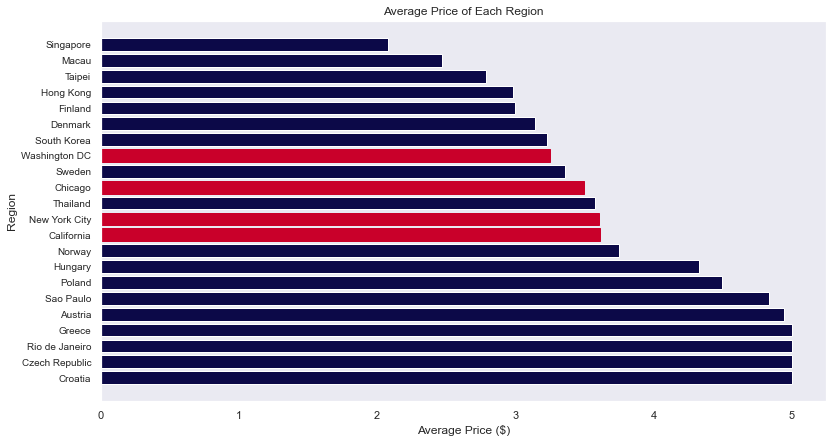

In [174]:
plt.figure(figsize=(13,7))
pltreg = avgprice1.Region
pltprice = avgprice1['Average Price']
barlist = plt.barh(pltreg, pltprice, color="#0C0948")

barlist[9].set_color('#C9002A')
barlist[10].set_color('#C9002A')
barlist[12].set_color('#C9002A')
barlist[14].set_color('#C9002A')
plt.xlabel("Average Price ($)")
plt.ylabel("Region")
plt.title("Average Price of Each Region")
plt.yticks(fontsize=10)
plt.grid()
plt.savefig("PricePerRegion.png")
plt.show()

In [18]:
df_avgstar = df_price.groupby('region')['Michelin Star Count'].mean()
avgstar = pd.concat([df_avgstar], axis=1).reset_index()
avgstar.columns = ["Region", "Average Michelin Star Count"]
avgstar1 = avgstar.sort_values(by=["Average Michelin Star Count"], ascending=False)
avgstar1

,Region,Average Michelin Star Count
10,Macau,1.578947
0,Austria,1.421053
8,Hong Kong,1.412698
17,South Korea,1.346154
11,New York City,1.324324
18,Sweden,1.318182
1,California,1.311111
19,Taipei,1.291667
5,Denmark,1.250000
12,Norway,1.250000


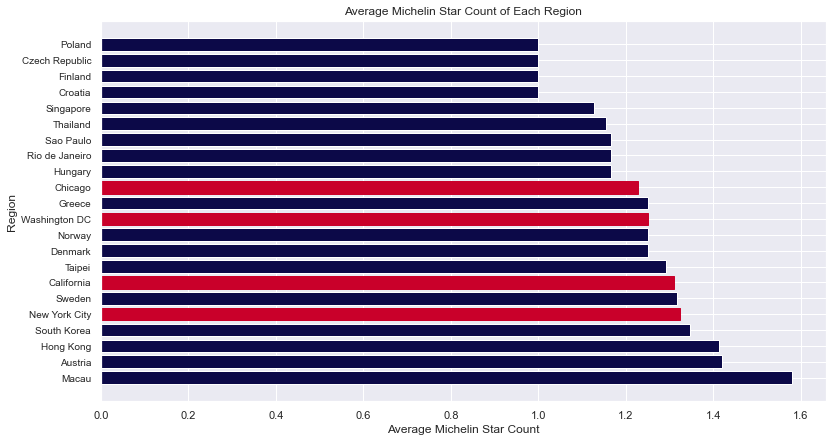

In [177]:
plt.figure(figsize=(13,7))

starlist = plt.barh(avgstar1.Region, avgstar1['Average Michelin Star Count'], color="#0C0948")
starlist[4].set_color('#C9002A')
starlist[6].set_color('#C9002A')
starlist[10].set_color('#C9002A')
starlist[12].set_color('#C9002A')
plt.xlabel("Average Michelin Star Count")
plt.ylabel("Region")
plt.title("Average Michelin Star Count of Each Region")
plt.yticks(fontsize=10)
plt.savefig("MichStarxRegion.png")
plt.show()

In [ ]:
# Interesting note: Hong Kong ranks in the bottom 5 when it comes to price point and top 3 when it comes 
# to michelin star count. Catonese cuisine ranks as the most popular in Hong Kong. Catonese Food
# markedly cheaper than the other top 10 cusines without taking a hit in michelin star count
# compared to those more expensive cuisines.

In [22]:
df10 = df.groupby("cuisine")["region"].count()
df12 = pd.concat([df10], axis=1).reset_index()
df12.columns = ["Cuisine", "Restaurants"]
summ12 = df12.sort_values(by=["Restaurants"], ascending=False).head(10)
summ12

,Cuisine,Restaurants
45,Modern cuisine,108
13,Contemporary,75
34,Japanese,54
14,Creative,46
8,Cantonese,40
43,Modern British,38
22,French,29
30,Innovative,28
32,Italian,21
23,French contemporary,19


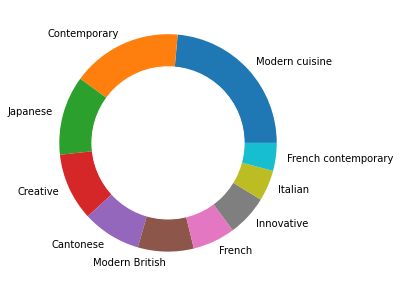

TypeError: object of type 'int' has no len()

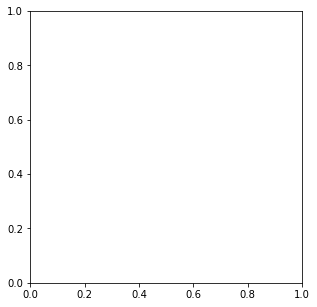

In [36]:

# https://www.python-graph-gallery.com/donut-plot/
plt.figure(figsize=(10,5))
size_of_groups = summ12["Restaurants"]
labels = summ12.Cuisine
# Create a pieplot
plt.pie(size_of_groups, labels=labels)
explode=0 

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.figure(figsize=(10,5))

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(size_of_groups, explode=explode, labels=labels, colors=["orchid",
        "gold", "salmon", "silver", "lightgreen", "plum", "lightcoral", "bisque",
        "paleturquoise", "khaki"], autopct="%1.1f%%", shadow=True, startangle=250)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("Top 10 International Cuisines", fontsize=14)

plt.show()

In [37]:
dfc = df.groupby("cuisine")["Michelin Star Count"]
dfc1 = pd.concat([dfc], axis=1).reset_index()
dfc1.columns = ["Cuisine", "1 Star", "2 Star", '3 Star']
#summ12 = df12.sort_values(by=["Restaurants"], ascending=False).head(10)
#summ12

TypeError: cannot concatenate object of type '<class 'pandas.core.groupby.generic.SeriesGroupBy'>'; only Series and DataFrame objs are valid

In [38]:
mask1 = df_price.price == "$"
mask2 = df_price.price == "$$"
mask3 = df_price.price == "$$$"
mask4 = df_price.price == "$$$$"
mask5 = df_price.price == "$$$$$"
df1d = df_price.loc[mask1]
df1dol = df1d.region.value_counts()
df2d = df_price.loc[mask2]
df2dol = df2d.region.value_counts()
df3d = df_price.loc[mask3]
df3dol = df3d.region.value_counts()
df4d = df_price.loc[mask4]
df4dol = df4d.region.value_counts()
df5d = df_price.loc[mask5]
df5dol = df5d.region.value_counts()
regpr_df = pd.concat([df1dol, df2dol, df3dol, df4dol, df5dol, df1], axis=1)
regpr_df.columns = ["$ Count", "$$ Count", "$$$ Count", "4$ Count", "5$ Count", "Total"]
regpr_df = regpr_df.fillna(0)
#regpr.style.format({"$ Count":, "$$ Count", "$$$ Count", "4$ Count", "5$ Count"})

In [39]:
reg_clean = regpr_df.astype(int)
reg_clean

,$ Count,$$ Count,$$$ Count,4$ Count,5$ Count,Total
Singapore,16,11,7,3,2,39
Hong Kong,9,15,18,10,11,63
Macau,3,8,5,2,1,19
Taipei,1,9,8,6,0,24
South Korea,1,1,18,3,3,26
Thailand,1,4,6,9,6,26
New York City,0,7,15,52,0,74
Denmark,0,6,12,10,0,28
California,0,6,23,61,0,90
Washington DC,0,4,4,8,0,16


In [155]:
avgs = df_price.groupby('cuisine')['Price Point'].mean()
count = df_price.groupby('cuisine')['name'].count()
star = df_price.groupby('cuisine')["Michelin Star Count"].mean()
summ1 = pd.concat([avgs, star, count], axis=1).reset_index()
summ1.columns = ["Cuisine", "Average Price Point ($)", "Average Michelin Star Rating", "Total Restaurants"]
summ2 = summ1.sort_values(by=["Total Restaurants"], ascending=False).head(10).reset_index()
summ3 = summ2.sort_values(by=["Total Restaurants"], ascending=False).head(10).reset_index()
summ3.style.format({"Average Price Point ($)":"{:.3f}", "Average Michelin Star Rating":"{:.3f}"})


,level_0,index,Cuisine,Average Price Point ($),Average Michelin Star Rating,Total Restaurants
0,0,13,Contemporary,3.693,1.507,75
1,1,32,Japanese,3.961,1.176,51
2,2,40,Modern cuisine,3.735,1.184,49
3,3,8,Cantonese,2.225,1.325,40
4,4,14,Creative,4.032,1.484,31
5,5,28,Innovative,3.536,1.286,28
6,6,21,French contemporary,3.263,1.579,19
7,7,30,Italian,3.500,1.167,18
8,8,20,French,3.611,1.333,18
9,9,53,Sushi,4.000,1.353,17


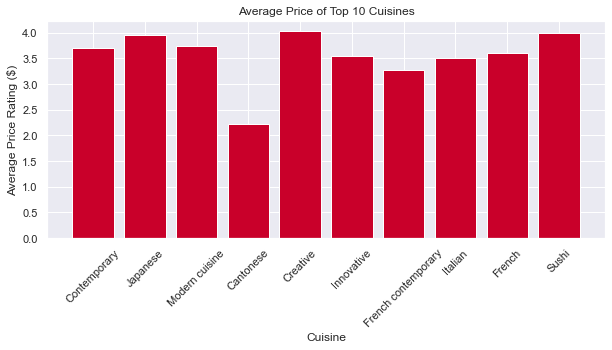

In [156]:
plt.figure(figsize=(10,4))
plt.bar(summ3.Cuisine, summ3["Average Price Point ($)"], color="#c9002a")
plt.xlabel("Cuisine")
plt.ylabel("Average Price Rating ($)")
plt.title("Average Price of Top 10 Cuisines")
plt.xticks(rotation = 45)
plt.savefig("PriceforCuisine.png", bbox_inches= 'tight')
plt.show()

In [74]:
regUS_df = df_price.loc[(df_price['region'] == "California") | (df_price['region'] == "New York City") | (df_price['region'] == "Chicago") | (df_price['region'] == "Washington DC")]
regUS_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 12 to 689
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           202 non-null    int64  
 1   name                 202 non-null    object 
 2   year                 202 non-null    int64  
 3   latitude             202 non-null    float64
 4   longitude            202 non-null    float64
 5   city                 202 non-null    object 
 6   region               202 non-null    object 
 7   zipCode              202 non-null    object 
 8   cuisine              202 non-null    object 
 9   price                202 non-null    object 
 10  url                  202 non-null    object 
 11  Michelin Star Count  202 non-null    int64  
 12  Price Point          202 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 22.1+ KB


In [77]:
avgs1 = regUS_df.groupby('region')['Price Point'].mean()
star1 = regUS_df.groupby('region')["Michelin Star Count"].mean()
summus_df = pd.concat([avgs1, star1], axis=1).reset_index()
summus_df.columns = ["Region", "Average Price ($)", "Average Michelin Star Rating"]
summ_us2 = summus_df.sort_values(by=["Average Price ($)"], ascending=False).head(10).reset_index()
summ_us2.style.format({"Average Price Point ($)":"{:.3f}", "Average Michelin Star Rating":"{:.3f}"})

,index,Region,Average Price ($),Average Michelin Star Rating
0,0,California,3.611111,1.311
1,2,New York City,3.608108,1.324
2,1,Chicago,3.500000,1.227
3,3,Washington DC,3.250000,1.250


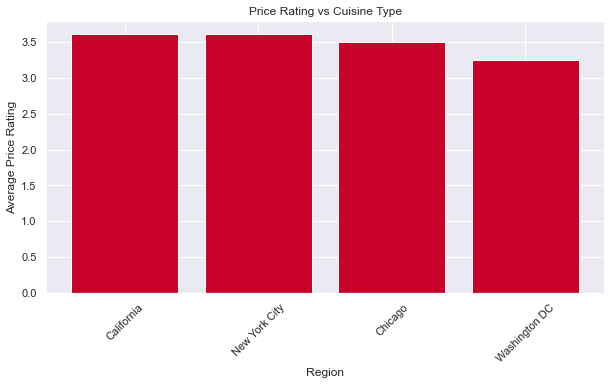

In [79]:
plt.figure(figsize=(10,5))
plt.bar(summ_us2.Region, summ_us2["Average Price ($)"], color="#C9002A")
plt.xlabel("Region")
plt.ylabel("Average Price Rating")
plt.title("Price Rating vs Cuisine Type")
plt.xticks(rotation = 45)
plt.show()

In [82]:
avgs1c = regUS_df.groupby('cuisine')['Price Point'].mean()
star1c = regUS_df.groupby('cuisine')["Michelin Star Count"].mean()
count1c = regUS_df.groupby('cuisine')['name'].count()
summus_dfc = pd.concat([avgs1c, star1c, count1c], axis=1).reset_index()
summus_dfc.columns = ["Cuisine", "Average Price ($)", "Average Michelin Star Rating", "Total Restaurants"]
summ_usc2 = summus_dfc.sort_values(by=["Average Price ($)"], ascending=False).head(10).reset_index()
summ_usc2.style.format({"Average Price Point ($)":"{:.3f}", "Average Michelin Star Rating":"{:.3f}"})

,index,Cuisine,Average Price ($),Average Michelin Star Rating,Total Restaurants
0,2,Austrian,4.000000,1.000,1
1,21,Steakhouse,4.000000,1.000,2
2,6,European,4.000000,1.000,1
3,18,Scandinavian,4.000000,1.667,3
4,11,International,4.000000,1.000,1
5,13,Japanese,3.842105,1.158,38
6,19,Seafood,3.800000,1.800,5
7,12,Italian,3.700000,1.100,10
8,5,Contemporary,3.693333,1.507,75
9,15,Mediterranean,3.666667,1.000,3


In [83]:
maskcal = regUS_df.region == "California"
masknyc = regUS_df.region == "New York City"
maskchi = regUS_df.region == "Chicago"
maskdc = regUS_df.region == "Washington DC"
df1cal= regUS_df.loc[maskcal]
df1nyc = regUS_df.loc[masknyc]
df1chi= regUS_df.loc[maskchi]
df1dc= regUS_df.loc[maskdc]

In [91]:
df2dc = df1dc.cuisine.value_counts()
df3dc = pd.concat([df2dc], axis=1).reset_index()
df3dc.columns = ["Cuisine", "Count"]
df3dc

,Cuisine,Count
0,Contemporary,7
1,American,3
2,Italian,2
3,European,1
4,Seafood,1
5,Japanese,1
6,Mediterranean,1


In [106]:
df3dc.Cuisine.unique()

array(['Contemporary', 'American', 'Italian', 'European', 'Seafood',
       'Japanese', 'Mediterranean'], dtype=object)

In [128]:
cuisine_map = {'Contemporary': 'Contemporary', 'American':"Other", 'Italian':"Other", 'European':'Other', 
               'Seafood':'Other', 'Japanese':'Other', 'Mediterranean':'Other'}
    

dcgroups = df3dc.assign(Groups=df3dc.Cuisine.map(cuisine_map)).fillna('Other')
dcgroups

,Cuisine,Count,Groups
0,Contemporary,7,Contemporary
1,American,3,Other
2,Italian,2,Other
3,European,1,Other
4,Seafood,1,Other
5,Japanese,1,Other
6,Mediterranean,1,Other


In [129]:
maskcal = regUS_df.region == "California"
masknyc = regUS_df.region == "New York City"
maskchi = regUS_df.region == "Chicago"
maskdc = regUS_df.region == "Washington DC"
df1cal= regUS_df.loc[maskcal]
df1nyc = regUS_df.loc[masknyc]
df1chi= regUS_df.loc[maskchi]
df1dc= regUS_df.loc[maskdc]

In [130]:
df2cal = df1cal.cuisine.value_counts()
df3cal = pd.concat([df2cal], axis=1).reset_index()
df3cal.columns = ["Cuisine", "Count"]
df3cal

,Cuisine,Count
0,Contemporary,35
1,Japanese,18
2,Californian,14
3,Italian,3
4,Asian,2
5,Mexican,2
6,American,2
7,Chinese,2
8,French,2
9,Indian,2


In [135]:
df3cal.Cuisine.unique()

array(['Contemporary', 'Japanese', 'Californian', 'Italian', 'Asian',
       'Mexican', 'American', 'Chinese', 'French', 'Indian', 'Fusion',
       'International', 'Korean', 'Steakhouse', 'Seafood', 'Thai',
       'Moroccan'], dtype=object)

In [143]:
cuisine_map1 = {'Contemporary': 'Contemporary', 'Japanese':'Japanese', 'Californian':'Californian', 'Italian':"Other",
               'Asian': 'Other', 'Mexican':'Other', 'American':'Other', 'Chinese':'Other', 'French':'Other',
               'Indian': 'Other', 'Fusion':'Other','International':"Other", 'Korean':'Other', 'Steakhouse':'Other',
               'Seafood':'Other', 'Thai':"Other",'Moroccan': "Other"}
    

calgroups = df3cal.assign(Groups=df3cal.Cuisine.map(cuisine_map1)).fillna('Other')
calgroups

,Cuisine,Count,Groups
0,Contemporary,35,Contemporary
1,Japanese,18,Japanese
2,Californian,14,Californian
3,Italian,3,Other
4,Asian,2,Other
5,Mexican,2,Other
6,American,2,Other
7,Chinese,2,Other
8,French,2,Other
9,Indian,2,Other


In [93]:
df2nyc = df1nyc.cuisine.value_counts()
df3nyc = pd.concat([df2nyc], axis=1).reset_index()
df3nyc.columns = ["Cuisine", "Count"]
df3nyc

,Cuisine,Count
0,Japanese,19
1,Contemporary,18
2,French,6
3,Italian,4
4,American,4
5,Korean,4
6,Mexican,3
7,Seafood,3
8,Scandinavian,3
9,Mediterranean,2


In [94]:
df2chi = df1chi.cuisine.value_counts()
df3chi = pd.concat([df2chi], axis=1).reset_index()
df3chi.columns = ["Cuisine", "Count"]
df3chi

,Cuisine,Count
0,Contemporary,15
1,Gastropub,2
2,Fusion,1
3,French,1
4,Italian,1
5,American,1
6,Mexican,1


In [97]:
dfint = df.cuisine.value_counts()
df1int = pd.concat([dfint], axis=1).reset_index()
df1int.columns = ['Cuisine', 'Count']
df1int.head(10)

,Cuisine,Count
0,Modern cuisine,108
1,Contemporary,75
2,Japanese,54
3,Creative,46
4,Cantonese,40
5,Modern British,38
6,French,29
7,Innovative,28
8,Italian,21
9,French contemporary,19


In [101]:
dfallus = regUS_df.cuisine.value_counts()
df1allus = pd.concat([dfallus], axis=1).reset_index()
df1allus.columns = ['Cuisine', 'Count']
df1allus = df1allus.head(10)
df1allus

,Cuisine,Count
0,Contemporary,75
1,Japanese,38
2,Californian,14
3,American,10
4,Italian,10
5,French,9
6,Mexican,6
7,Seafood,5
8,Korean,5
9,Fusion,4


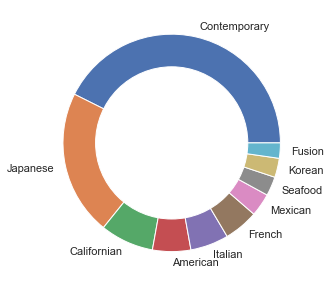

TypeError: object of type 'int' has no len()

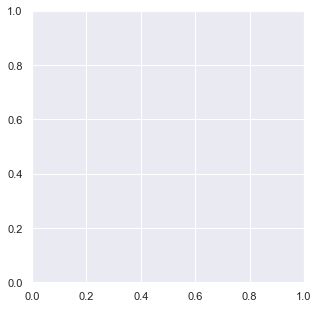

In [105]:
# https://www.python-graph-gallery.com/donut-plot/
plt.figure(figsize=(10,5))
size_of_groups = df1allus["Count"]
labels = df1allus.Cuisine
# Create a pieplot
plt.pie(size_of_groups, labels=labels)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.figure(figsize=(10,5))

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(size_of_groups, explode=explode, labels=labels, colors=['#C9002A','#0C0948'],
        autopct="%1.1f%%", shadow=True, startangle=250)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("US Region Breakdown", fontsize=14)

plt.show()

In [ ]:
# Contemporary cuisine is only found in the States

In [60]:
summ4 = summ3.sort_values(by=["Average Michelin Star Rating"], ascending=False).head(10).reset_index()
summ4

ValueError: cannot insert level_0, already exists

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(summ2.Cuisine, summ2["Average Michelin Star Rating"], color="#A80874")
plt.xlabel("Cuisine")
plt.ylabel("Average Michelin Star Count")
plt.title("Michelin Star Count vs Cuisine Type")
plt.xticks(rotation = 45)
plt.show()

In [63]:
dfvio = df_price.groupby("Price Point")['Michelin Star Count'].mean()
dfviolin = pd.concat([dfvio], axis=1).reset_index()
dfviolin.columns = ['Price','Average Michelin Star Count']
dfviolin

,Price,Average Michelin Star Count
0,1,1.064516
1,2,1.133333
2,3,1.111888
3,4,1.487310
4,5,1.383562


In [69]:
df_price.head()

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count,Price Point
0,0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1,5
1,1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
2,2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
3,3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
4,4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1,4


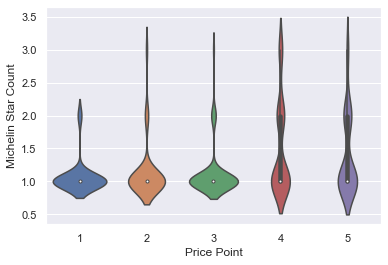

In [70]:
sns.violinplot(data=df_price, x="Price Point", y="Michelin Star Count")
plt.show()